In [1]:
import numpy as np
import random
import json

# Define room size and furniture options
ROOM_WIDTH = 10
ROOM_HEIGHT = 10
FURNITURE = {
    "bed": (3, 2),
    "table": (2, 2),
    "chair": (1, 1),
    "sofa": (3, 1),
    "wardrobe": (2, 3)
}

# Generate synthetic layouts
def generate_synthetic_data(num_samples=500):
    data = []
    for _ in range(num_samples):
        layout = []
        occupied = np.zeros((ROOM_WIDTH, ROOM_HEIGHT))

        for furniture, (w, h) in FURNITURE.items():
            placed = False
            attempts = 0
            while not placed and attempts < 100:
                x = random.randint(0, ROOM_WIDTH - w)
                y = random.randint(0, ROOM_HEIGHT - h)

                # Check if space is free
                if np.sum(occupied[x:x+w, y:y+h]) == 0:
                    layout.append({"furniture": furniture, "x": x, "y": y})
                    occupied[x:x+w, y:y+h] = 1
                    placed = True
                attempts += 1

        # Compute a heuristic score (higher is better)
        score = random.uniform(0.5, 1.0)  # Placeholder score

        data.append({"layout": layout, "score": score})

    # Save dataset
    with open("synthetic_data.json", "w") as f:
        json.dump(data, f)

generate_synthetic_data()
print("Synthetic dataset generated and saved.")


Synthetic dataset generated and saved.


In [2]:
import tensorflow as tf
import json
import numpy as np

# Load dataset
with open("synthetic_data.json", "r") as f:
    data = json.load(f)

# Define furniture and preprocess data
FURNITURE = {
    "bed": (3, 2),
    "table": (2, 2),
    "chair": (1, 1),
    "sofa": (3, 1),
    "wardrobe": (2, 3)
}

def preprocess_data(data):
    X, y = [], []
    for entry in data:
        features = []
        for furniture in FURNITURE.keys():
            found = next((item for item in entry["layout"] if item["furniture"] == furniture), None)
            features.extend([found["x"] if found else 0, found["y"] if found else 0])
        X.append(features)
        y.append(entry["score"])
    return np.array(X), np.array(y)

X, y = preprocess_data(data)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

# Use MeanSquaredError explicitly
model.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError(), metrics=["mae"])

# Train and save the model
model.fit(X, y, epochs=50, batch_size=16, validation_split=0.2)
model.save("layout_model.h5")

print("Model trained and saved successfully.")


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 1.1013 - mae: 0.8168 - val_loss: 0.1694 - val_mae: 0.3391
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1551 - mae: 0.3204 - val_loss: 0.1077 - val_mae: 0.2650
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1015 - mae: 0.2575 - val_loss: 0.0878 - val_mae: 0.2431
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0757 - mae: 0.2244 - val_loss: 0.0820 - val_mae: 0.2345
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605 - mae: 0.1984 - val_loss: 0.0751 - val_mae: 0.2232
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0489 - mae: 0.1803 - val_loss: 0.0720 - val_mae: 0.2172
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mae: 0.1845 - val_loss: 0.0671 - val_mae: 0.2114
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - mae: 0.1658 - val_loss: 0.0637 - val_mae: 0.2071
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0412 - m

Model trained and saved successfully.


<ipython-input-3-30f0a0d86a15>:70: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((x, y), w, h, color=color, alpha=0.8, edgecolor='black', linewidth=1.5))


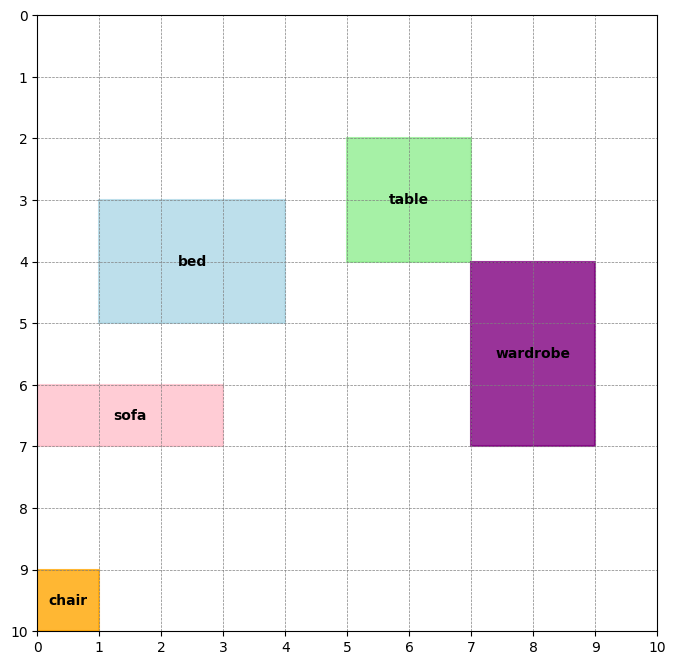

In [3]:
import numpy as np
import random
import json
import matplotlib.pyplot as plt

# Define room size and furniture options
ROOM_WIDTH = 10
ROOM_HEIGHT = 10
FURNITURE = {
    "bed": (3, 2),
    "table": (2, 2),
    "chair": (1, 1),
    "sofa": (3, 1),
    "wardrobe": (2, 3)
}

# Assign distinct colors to each furniture type
FURNITURE_COLORS = {
    "bed": "lightblue",
    "table": "lightgreen",
    "chair": "orange",
    "sofa": "pink",
    "wardrobe": "purple"
}

# Generate synthetic layouts
def generate_synthetic_data(num_samples=5):
    data = []
    for _ in range(num_samples):
        layout = []
        occupied = np.zeros((ROOM_WIDTH, ROOM_HEIGHT))

        for furniture, (w, h) in FURNITURE.items():
            placed = False
            attempts = 0
            while not placed and attempts < 100:
                x = random.randint(0, ROOM_WIDTH - w)
                y = random.randint(0, ROOM_HEIGHT - h)

                # Check if space is free
                if np.sum(occupied[x:x+w, y:y+h]) == 0:
                    layout.append({"furniture": furniture, "x": x, "y": y, "w": w, "h": h})
                    occupied[x:x+w, y:y+h] = 1
                    placed = True
                attempts += 1

        # Compute a heuristic score (higher is better)
        score = random.uniform(0.5, 1.0)  # Placeholder score

        data.append({"layout": layout, "score": score})

    # Save dataset
    with open("synthetic_data.json", "w") as f:
        json.dump(data, f)

    return data

# Visualization function
def visualize_layout(layout):
    fig, ax = plt.subplots(figsize=(8, 8))  # Bigger size
    ax.set_xlim(0, ROOM_WIDTH)
    ax.set_ylim(0, ROOM_HEIGHT)
    ax.set_xticks(range(ROOM_WIDTH + 1))
    ax.set_yticks(range(ROOM_HEIGHT + 1))
    ax.grid(True, color='gray', linestyle='--', linewidth=0.5)

    for item in layout:
        x, y, w, h = item["x"], item["y"], item["w"], item["h"]
        color = FURNITURE_COLORS.get(item["furniture"], "gray")  # Default to gray if not found
        ax.add_patch(plt.Rectangle((x, y), w, h, color=color, alpha=0.8, edgecolor='black', linewidth=1.5))
        ax.text(x + w/2, y + h/2, item["furniture"], fontsize=10, ha="center", va="center", color="black", fontweight="bold")

    plt.gca().invert_yaxis()
    plt.show()

# Generate data and visualize one layout
data = generate_synthetic_data(1)
visualize_layout(data[0]["layout"])

In [4]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf

# Load the trained model with explicit loss function
model = load_model("layout_model.h5", custom_objects={"MeanSquaredError": tf.keras.losses.MeanSquaredError()})

# Define furniture
FURNITURE = {
    "bed": (3, 2),
    "table": (2, 2),
    "chair": (1, 1),
    "sofa": (3, 1),
    "wardrobe": (2, 3)
}

# Generate a random input layout
def generate_layout():
    sample_input = np.random.rand(1, len(FURNITURE) * 2)  # Random input
    predicted_score = model.predict(sample_input)
    return sample_input.reshape(-1, 2), predicted_score[0][0]

# Get a prediction
layout, score = generate_layout()
print("Predicted Layout:", layout)
print("Predicted Score:", score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Layout: [[0.69399229 0.00342925]
 [0.46535517 0.03519172]
 [0.31539724 0.92295018]
 [0.97286159 0.42499506]
 [0.55375774 0.18773027]]
Predicted Score: 0.25592253


In [5]:
!pip install fastapi uvicorn


In [6]:
!pip install pyngrok

In [8]:
from fastapi import FastAPI
import uvicorn
from pyngrok import ngrok
import nest_asyncio

# Apply fix for event loop issue in Colab
nest_asyncio.apply()

app = FastAPI()

@app.get("/")
def home():
    return {"message": "FastAPI is running!"}

# Start ngrok tunnel
ngrok_tunnel = ngrok.connect(8000)
print(f"Public URL: {ngrok_tunnel.public_url}")

# Run FastAPI inside Colab
uvicorn.run(app, host="0.0.0.0", port=8000)


ERROR:pyngrok.process.ngrok:t=2025-03-11T20:14:52+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-11T20:14:52+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

In [9]:
!ngrok authtoken 2uB5Jyn3cpPXsdq3ypgBJv6snCp_6AtfL1f5CLrs5kCv6pdPm


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [10]:
!pkill -f ngrok

In [11]:
public_url = ngrok.connect(8080)
print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://aa3f-34-30-164-153.ngrok-free.app" -> "http://localhost:8080"


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pkill -f ngrok

In [ ]:
!ngrok authtoken 2uB5Jyn3cpPXsdq3ypgBJv6snCp_6AtfL1f5CLrs5kCv6pdPm

In [14]:
# Import required libraries
from fastapi import FastAPI
from fastapi.responses import FileResponse
import uvicorn
import nest_asyncio
from pyngrok import ngrok
import os

# Stop previous ngrok tunnels (prevents errors)
ngrok.kill()

# Initialize FastAPI app
app = FastAPI()

# Route to check if API is running
@app.get("/")
def home():
    return {"message": "FastAPI is running successfully in Google Colab!"}

# Route to serve the image
@app.get("/image")
def get_image():
    image_path = "circuit_layout.png"  # Ensure this file exists
    if os.path.exists(image_path):
        return FileResponse(image_path, media_type="image/png")
    return {"error": "Image not found!"}

# Apply nest_asyncio to prevent Colab runtime issues
nest_asyncio.apply()

# Start a new ngrok tunnel
public_url = ngrok.connect(8000).public_url
print(f"🚀 Public URL: {public_url}")

# Start Uvicorn server
uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [67002]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


🚀 Public URL: https://adcc-34-30-164-153.ngrok-free.app


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [67002]


In [15]:
# Import required libraries
from fastapi import FastAPI
from fastapi.responses import FileResponse
import uvicorn
import nest_asyncio
from pyngrok import ngrok
import os
import requests
from PIL import Image
from io import BytesIO

# Stop any process running on port 8000 (Fixes Address Already in Use)
os.system("fuser -k 8000/tcp")

# Initialize FastAPI app
app = FastAPI()

# Route to check if API is running
@app.get("/")
def home():
    return {"message": "FastAPI is running successfully in Google Colab!"}

# Route to serve an image file
@app.get("/image")
def get_image():
    image_path = "download (2).png"  # Ensure this file exists
    if os.path.exists(image_path):
        return FileResponse(image_path, media_type="image/png")
    return {"error": "Image not found!"}

# Route to fetch an image from a URL and display it
@app.get("/fetch_image")
def fetch_image(image_url: str):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an error if request fails

        # Load image correctly to prevent UnidentifiedImageError
        img = Image.open(BytesIO(response.content))
        img.show()  # Display the image

        return {"message": "Image fetched and displayed successfully"}
    except requests.exceptions.RequestException as e:
        return {"error": f"Request failed: {e}"}
    except Exception as e:
        return {"error": f"Image processing failed: {e}"}

# Apply nest_asyncio to prevent Colab runtime issues
nest_asyncio.apply()

# Start a new ngrok tunnel
public_url = ngrok.connect(8000).public_url
print(f"🚀 Public URL: {public_url}")

# Start Uvicorn server
uvicorn.run(app, host="0.0.0.0", port=8000)

🚀 Public URL: https://fac6-34-30-164-153.ngrok-free.app


INFO:     Started server process [67002]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [67002]


In [16]:
import os
print(os.getcwd())  # Show the current working directory
print(os.listdir())  # List all files in the current directory


/content
['.config', 'download (2) (1).png', 'drive', 'download (2) (2).png', 'layout_model.h5', 'synthetic_data.json', 'download (2).png', 'sample_data']


In [17]:
file_path = "/content/download (2).png"  # Adjust this path based on Step 1 output
print(os.path.exists(file_path))


True


In [18]:
from google.colab import files
uploaded = files.upload()  # This will open a file upload dialog


Saving download (2).png to download (2) (3).png


In [19]:
print(os.listdir())  # Confirm file is uploaded


['.config', 'download (2) (1).png', 'drive', 'download (2) (2).png', 'layout_model.h5', 'synthetic_data.json', 'download (2).png', 'download (2) (3).png', 'sample_data']


In [20]:
file_path = "/content/download (2).png"  # Adjust this path based on Step 1 output
print(os.path.exists(file_path))


True


In [21]:
from fastapi.responses import FileResponse

@app.get("/")
def show_image():
    return FileResponse("download (2).png")

In [22]:
!pip install fastapi uvicorn pyngrok nest_asyncio

from fastapi import FastAPI
from fastapi.responses import FileResponse
from pydantic import BaseModel
import uvicorn
import threading
import nest_asyncio
import time
import socket
import os
from pyngrok import ngrok

# Initialize FastAPI app
app = FastAPI()

# Define input schema
class InputData(BaseModel):
    feature1: float
    feature2: float

# Dummy model function (Replace with actual ML model)
def model_predict(feature1, feature2):
    return feature1 + feature2  # Example logic

@app.post("/predict")
def predict(data: InputData):
    prediction = model_predict(data.feature1, data.feature2)
    return {"prediction": prediction}

# Serve the image
@app.get("/image")
def get_image():
    image_path = " download (2).png"
    if os.path.exists(image_path):
        return FileResponse(image_path, media_type="image/png")
    return {"error": "Image not found"}

# Allow FastAPI to run inside Jupyter/Colab
nest_asyncio.apply()

# Function to find an available port dynamically
def find_available_port(start_port=8000, max_port=8100):
    for port in range(start_port, max_port):
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            if s.connect_ex(('127.0.0.1', port)) != 0:  # Port is free
                return port
    raise RuntimeError("No available ports found")

port = find_available_port()

# Start FastAPI server in a background thread
def run():
    uvicorn.run(app, host="0.0.0.0", port=port)

thread = threading.Thread(target=run)
thread.daemon = True
thread.start()

# Wait for FastAPI to start
time.sleep(5)

# Kill existing tunnels and start Ngrok on the correct port
try:
    ngrok.kill()
    public_url = ngrok.connect(port).public_url  # Use the dynamically assigned port
    print("🚀 Public URL:", public_url)
    print("🌆 Image URL:", f"{public_url}/image")  # Direct image link
except Exception as e:
    print("❌ Error starting Ngrok:", e)

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-4' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    se

INFO:     Started server process [67002]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


🚀 Public URL: https://d10a-34-30-164-153.ngrok-free.app
🌆 Image URL: https://d10a-34-30-164-153.ngrok-free.app/image


In [24]:
import requests

url = "https://0a1c-34-30-164-153.ngrok-free.app/image"
headers = {"ngrok-skip-browser-warning": "true"}

response = requests.get(url, headers=headers)

with open("download (2).png", "wb") as f:
    f.write(response.content)

print("Image downloaded successfully!")


Image downloaded successfully!


In [26]:
from fastapi import FastAPI
from fastapi.responses import FileResponse
import uvicorn
import os

app = FastAPI()

# Set the correct path for your uploaded image
IMAGE_PATH = "download (2).png"  # Update this path if needed

@app.get("/")
def home():
    return {"message": "Visit /image to see the generated layout."}

@app.get("/image")
def serve_image():
    if os.path.exists(IMAGE_PATH):
        return FileResponse(IMAGE_PATH, media_type="image/png")
    return {"error": "Image not found!"}

# Run FastAPI server
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8080)


INFO:     Started server process [67002]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 98] error while attempting to bind on address ('0.0.0.0', 8080): address already in use
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 163, in startup
    server = await loop.create_server(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1536, in create_server
    raise OSError(err.errno, msg) from None
OSError: [Errno 98] error while attempting to bind on address ('0.0.0.0', 8080): address already in use

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-32b9943ffab1>", line 23, in <cell line: 0>
    uvicorn.run(app, host="0.0.0.0", port=8080)
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
   

TypeError: object of type 'NoneType' has no len()

In [30]:
!pip install fastapi uvicorn pyngrok nest_asyncio

from fastapi import FastAPI
from fastapi.responses import FileResponse
from pydantic import BaseModel
import uvicorn
import threading
import nest_asyncio
import time
import socket
import os
from pyngrok import ngrok

# Initialize FastAPI app
app = FastAPI()

# Define input schema
class InputData(BaseModel):
    feature1: float
    feature2: float

# Dummy model function (Replace with actual ML model)
def model_predict(feature1, feature2):
    return feature1 + feature2  # Example logic

@app.post("/predict")
def predict(data: InputData):
    prediction = model_predict(data.feature1, data.feature2)
    return {"prediction": prediction}

# Serve the image
@app.get("/image")
def get_image():
    image_path = "download (2).png"  # Removed extra space
    if os.path.exists(image_path):
        return FileResponse(image_path, media_type="image/png")
    return {"error": "Image not found"}

# Allow FastAPI to run inside Jupyter/Colab
nest_asyncio.apply()

# Function to find an available port dynamically
def find_available_port(start_port=8000, max_port=8100):
    for port in range(start_port, max_port):
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            if s.connect_ex(('127.0.0.1', port)) != 0:  # Port is free
                return port
    raise RuntimeError("No available ports found")

# Find an available port before starting the server
port = find_available_port()

# Start FastAPI server in a background thread
def run():
    uvicorn.run(app, host="0.0.0.0", port=port)  # Use the dynamic port

thread = threading.Thread(target=run)
thread.daemon = True
thread.start()

# Wait for FastAPI to start
time.sleep(5)

# Kill existing tunnels and start Ngrok on the correct port
try:
    ngrok.kill()
    public_url = ngrok.connect(port).public_url  # Use the dynamic port
    print("🚀 Public URL:", public_url)
    print("🌆 Image URL:", f"{public_url}/image")  # Direct image link
except Exception as e:
    print("❌ Error starting Ngrok:", e)

INFO:     Started server process [67002]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8002 (Press CTRL+C to quit)


🚀 Public URL: https://ba3e-34-30-164-153.ngrok-free.app
🌆 Image URL: https://ba3e-34-30-164-153.ngrok-free.app/image


In [33]:
import requests

ngrok_url = "https://ba3e-34-30-164-153.ngrok-free.app/image"  # Use your actual ngrok URL
headers = {"ngrok-skip-browser-warning": "true"}

response = requests.get(ngrok_url, headers=headers)

print(response.status_code)  # Should be 200 if successful
print(response.text)  # Prints the response


INFO:     34.30.164.153:0 - "GET /image HTTP/1.1" 200 OK
200
<!DOCTYPE html>
<html class="h-full" lang="en-US" dir="ltr">
  <head>
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Regular-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-RegularItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Medium-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-Semibold-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="https://cdn.ngrok.com/static/fonts/euclid-square/EuclidSquare-MediumItalic-WebS.woff" as="font" type="font/woff" crossorigin="anonymous" />
    <link rel="preload" href="htt

In [34]:
from google.colab import output
output.serve_kernel_port_as_window(8001)


Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>